In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('seaborn')
%matplotlib inline
import sklearn as sk

# Collecting dataset

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/ford.csv'
car_df = pd.read_csv(path)
car_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


# Analyzing data

In [3]:
car_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


Gives basic info about our dataset.

In [5]:
car_df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

This dataset does not contain any null attributes.

In [6]:
cols = car_df.columns
print('Columns in dataframe :')
for c in cols:
  print('\t', c)
print('Total columns: ', len(cols))

Columns in dataframe :
	 model
	 year
	 price
	 transmission
	 mileage
	 fuelType
	 tax
	 mpg
	 engineSize
Total columns:  9


###Count Plots of different Categorical values in our dataset:

**Model**

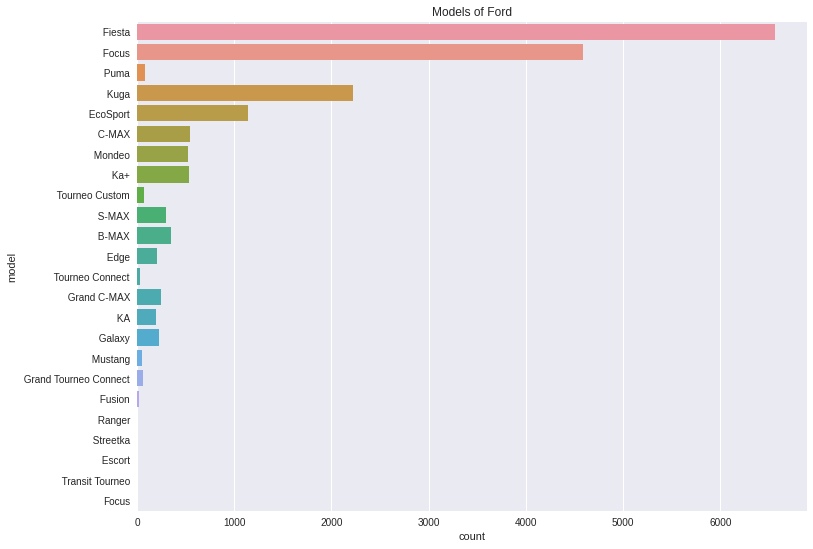

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64


In [7]:
# to see the number of cars of each model in our data frame
plt.figure(figsize=(12,9))
sns.countplot(y='model', data=car_df)
plt.title('Models of Ford')
plt.show()

print(car_df['model'].value_counts())

This shows that mostly cars are of model **Fiesta**, **Focus**, and **Kuga**.

**Transmission**

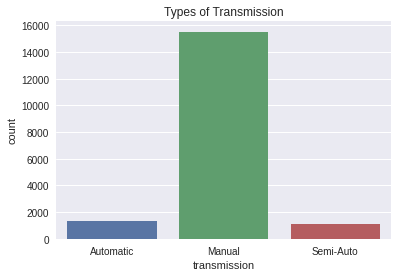

Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64


In [8]:
sns.countplot(x='transmission', data=car_df)
plt.title('Types of Transmission')
plt.show()

print(car_df['transmission'].value_counts())

The automatic transmission allows the vehicle to change to different gears on its own rather than the drivers making the adjustments.
Manual transmission is where that transmission relies on the drivers to use the clutch to accelerate.
Semi-Auto transmission is line automatic transmission but does not have any clutch but we can also change gears manually.

Above graph shows that **the number of cars with Manual transmission is more than other two**.

**Fuel Types**

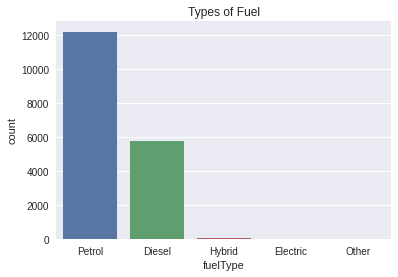

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64


In [9]:
sns.countplot(x='fuelType', data=car_df)
plt.title('Types of Fuel')
plt.show()

print(car_df['fuelType'].value_counts())

There are 5 types of fuel used in different models of Ford.
Petrol is used in more than 12000 cars.
This shows that **petrol** and **diesel** is used in most of the cars.

**Comparing Price with Fuel Type and Transmission**

barplot() plots the means of each category on the x axis.

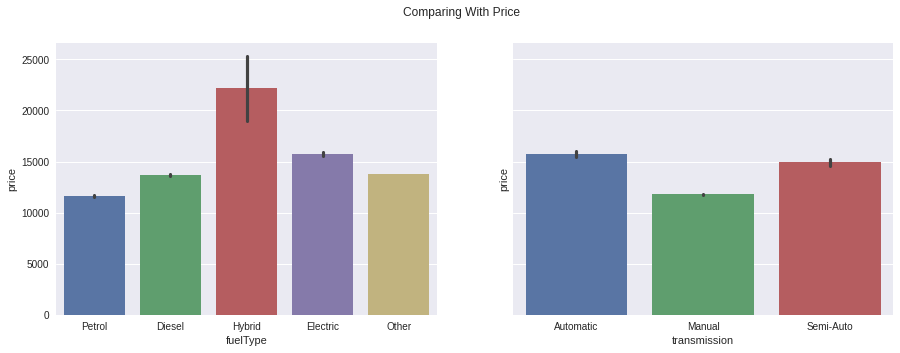

In [10]:
fuelType = car_df['fuelType']
transmission = car_df['transmission']
price = car_df['price']

fig, axes = plt.subplots(1, 2, figsize = (15,5), sharey = True)
fig.suptitle('Comparing With Price')
sns.barplot(x = fuelType, y = price, ax = axes[0])
sns.barplot(x = transmission, y = price, ax = axes[1])

This shows:
* Cars with Hybrid fuel type are expensive.
* Cars with Automatic transmission are expensive.

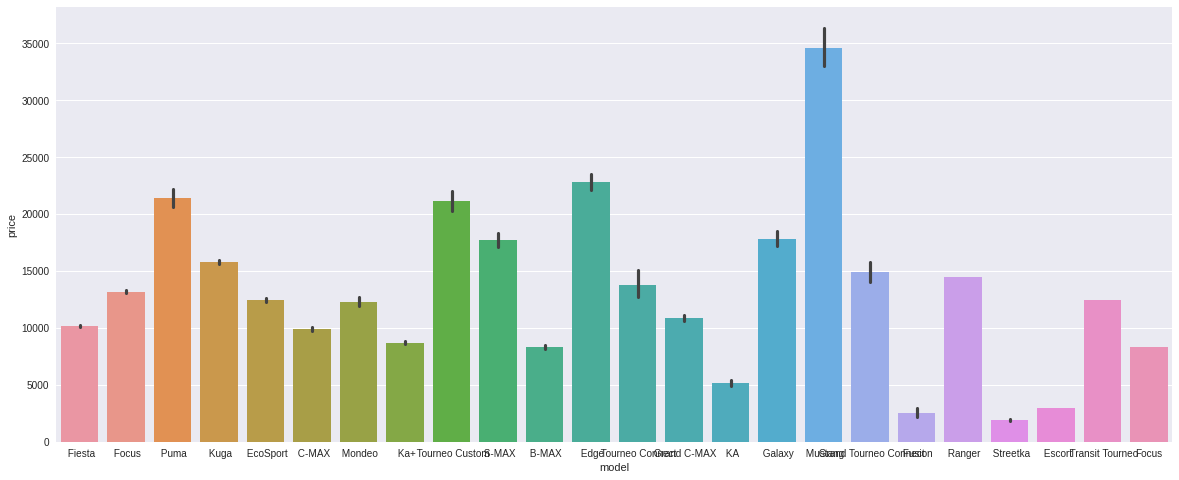

In [11]:
fig, axes = plt.subplots(figsize=(20,8))
sns.barplot(x = car_df['model'], y = car_df['price'], ax = axes)

###Changing categorical values to Numeric values.

In [12]:
transmissions = {
    'Manual': 0,
    'Automatic': 1,
    'Semi-Auto': 2
}
car_df.replace({'transmission':transmissions}, inplace = True)

fuelTypes = {
    'Petrol': 0,
    'Diesel': 1,
    'Hybrid': 2,
    'Electric': 3,
    'Other': 4
}
car_df.replace({'fuelType':fuelTypes}, inplace = True)

# printing data frame to see the changes
car_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,1,15944,0,150,57.7,1.0
1,Focus,2018,14000,0,9083,0,150,57.7,1.0
2,Focus,2017,13000,0,12456,0,150,57.7,1.0
3,Fiesta,2019,17500,0,10460,0,145,40.3,1.5
4,Fiesta,2019,16500,1,1482,0,145,48.7,1.0


In [13]:
# dropping model column
car_df.drop(columns=['model'], inplace=True)
car_df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,1,15944,0,150,57.7,1.0
1,2018,14000,0,9083,0,150,57.7,1.0
2,2017,13000,0,12456,0,150,57.7,1.0
3,2019,17500,0,10460,0,145,40.3,1.5
4,2019,16500,1,1482,0,145,48.7,1.0


Now we have all columns of numeric type.

In [14]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          17966 non-null  int64  
 1   price         17966 non-null  int64  
 2   transmission  17966 non-null  int64  
 3   mileage       17966 non-null  int64  
 4   fuelType      17966 non-null  int64  
 5   tax           17966 non-null  int64  
 6   mpg           17966 non-null  float64
 7   engineSize    17966 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 1.1 MB


Text(0.5, 1.0, 'Correlation between the columns')

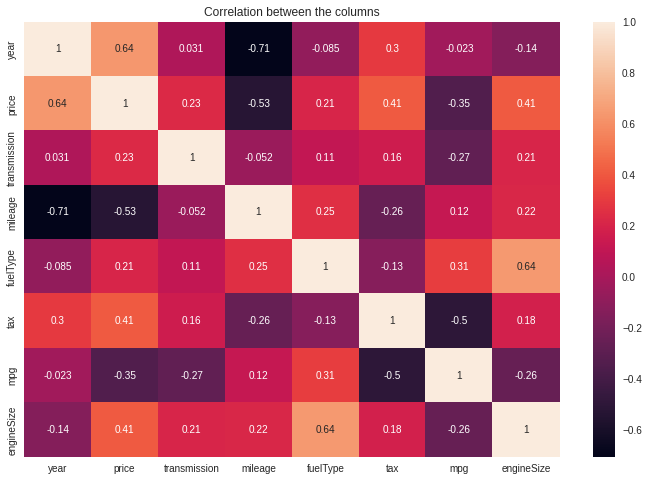

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(car_df.corr(), annot=True)
plt.title('Correlation between the columns')

In [16]:
car_df.corr()['price'].sort_values()

mileage        -0.530659
mpg            -0.346419
fuelType        0.209225
transmission    0.231806
tax             0.406857
engineSize      0.411178
year            0.636009
price           1.000000
Name: price, dtype: float64

The manufacturing year has highest correlation with price.

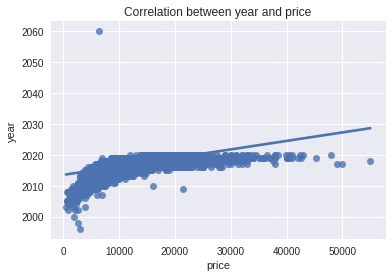

In [17]:
plt.title('Correlation between year and price')
sns.regplot(x='price', y='year', data=car_df)

# Model Training

In [18]:
X = car_df.drop('price', axis=1) # drops price from each row
y = car_df['price'] # output variable

print('Shape of x : ', X.shape)
print('Shape of y : ', y.shape)

Shape of x :  (17966, 7)
Shape of y :  (17966,)


**Splitting datafram**

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)
print('Shape of X_train : ', X_train.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_test : ', y_test.shape)

Shape of X_train :  (12576, 7)
Shape of y_train :  (12576,)
Shape of X_test :  (5390, 7)
Shape of y_test :  (5390,)


**StandardScaler** removes the mean and scales each feature/variable to unit variance.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Linear Regression**

In [21]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
# training model
LR_model.fit(X_train, y_train)
# making predictions
LR_predictions = LR_model.predict(X_test)

**Decision Tree Regressor**

In [22]:
from sklearn.tree import DecisionTreeRegressor

DTR_model = DecisionTreeRegressor()
# training model
DTR_model.fit(X_train, y_train)
# making predictions
DTR_predictions = DTR_model.predict(X_test)

**eXtream Gradient Boost Regressor**

In [23]:
from xgboost import XGBRegressor

XGBR_model = XGBRegressor()
# training model
XGBR_model.fit(X_train, y_train)
# making predictions
XGBR_predictions = XGBR_model.predict(X_test)

[07:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Model Evaluation

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [25]:
# Mean Absolute Error
LR_mae = mean_absolute_error(y_test, LR_predictions)
print('Mean Absolute Error of LR model : ', LR_mae)
DTR_mae = mean_absolute_error(y_test, DTR_predictions)
print('Mean Absolute Error of DTR model : ', DTR_mae)
XGBR_mae = mean_absolute_error(y_test, DTR_predictions)
print('Mean Absolute Error of XGBR model : ', XGBR_mae, '\n')


# R2 Score
LR_r2 = r2_score(y_test, LR_predictions)
print('R2 score of LR model : ', LR_r2)
DTR_r2 = r2_score(y_test, DTR_predictions)
print('R2 score of DTR model : ', DTR_r2)
XGBR_r2 = r2_score(y_test, XGBR_predictions)
print('R2 score of XGBR model : ', XGBR_r2)

Mean Absolute Error of LR model :  1728.0695450788817
Mean Absolute Error of DTR model :  1328.7968769325912
Mean Absolute Error of XGBR model :  1328.7968769325912 

R2 score of LR model :  0.753912130625055
R2 score of DTR model :  0.809779719743383
R2 score of XGBR model :  0.8809415652554894


In [26]:
# Accuracy of models

LR_accuracy = cross_val_score(LR_model, X_test, y_test, cv=4).mean()*100
print('Accuracy of Linear Regression model : ', LR_accuracy)

DTR_accuracy = cross_val_score(DTR_model, X_test, y_test, cv=4).mean()*100
print('Accuracy of Decision Tree model : ', DTR_accuracy)

XGBR_accuracy = cross_val_score(DTR_model, X_test, y_test, cv=4).mean()*100
print('Accuracy of  model : ', XGBR_accuracy)

Accuracy of Linear Regression model :  75.60302509048236
Accuracy of Decision Tree model :  83.16060595179461
Accuracy of  model :  82.9483077603709


Since **Decision tree** and **eXtreme gradient boost** both gives accuracy upto 83%.
We can use any one to predict price of old ford cars.

# Predictions

In [27]:
car_df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,1,15944,0,150,57.7,1.0
1,2018,14000,0,9083,0,150,57.7,1.0
2,2017,13000,0,12456,0,150,57.7,1.0
3,2019,17500,0,10460,0,145,40.3,1.5
4,2019,16500,1,1482,0,145,48.7,1.0


In [28]:
data = [
    {'year':2015, 'transmission':1, 'mileage':2000, 'fuelType':0, 'tax':145, 'mpg':60.0, 'engineSize':1.5},
    {'year':2020, 'transmission':0, 'mileage':1500, 'fuelType':1, 'tax':150, 'mpg':45.0, 'engineSize':1.0}
]
data = pd.DataFrame(data, [0, 1]) # passing [0,1] list of indexes
data

,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,2015,1,2000,0,145,60.0,1.5
1,2020,0,1500,1,150,45.0,1.0


In [29]:
pred = XGBR_model.predict(data.values)
print('Car price :', pred[0])
print('Car price :', pred[1])

Car price : 14979.374
Car price : 13284.349
